In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta  # technical analysis library

# Load the AAPL historical data
df_aapl = pd.read_csv("../data/AAPL_historical_data.csv")

# Preview the structure
df_aapl.head()

df_aapl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


Convert Date and Set Index

In [2]:
# Convert 'Date' column to datetime format
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])

# Set 'Date' as the index
df_aapl.set_index('Date', inplace=True)

# Sort the index (just in case)
df_aapl.sort_index(inplace=True)

# Preview the changes
df_aapl.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


Technical Indicators

In [3]:
# Make a working copy
df_aapl_indicators = df_aapl.copy()

# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df_aapl_indicators['SMA_20'] = ta.trend.sma_indicator(df_aapl_indicators['Close'], window=20)
df_aapl_indicators['SMA_50'] = ta.trend.sma_indicator(df_aapl_indicators['Close'], window=50)

# Calculate RSI (Relative Strength Index)
df_aapl_indicators['RSI_14'] = ta.momentum.rsi(df_aapl_indicators['Close'], window=14)

# Calculate MACD and Signal line
macd = ta.trend.macd(df_aapl_indicators['Close'])
macd_signal = ta.trend.macd_signal(df_aapl_indicators['Close'])

df_aapl_indicators['MACD'] = macd
df_aapl_indicators['MACD_signal'] = macd_signal

# Preview result
df_aapl_indicators[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_signal']].tail()


,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_signal
Date,,,,,,
2024-07-24,218.539993,224.228500,208.474199,48.687742,4.662717,6.678882
2024-07-25,217.490005,224.440500,209.098399,47.386437,3.748082,6.092722
2024-07-26,217.960007,224.633500,209.709000,48.055700,3.026267,5.479431
2024-07-29,218.240005,225.014500,210.279400,48.476184,2.448591,4.873263
2024-07-30,218.800003,225.117001,210.858600,49.359115,2.012764,4.301163


Plot Close Price with SMA

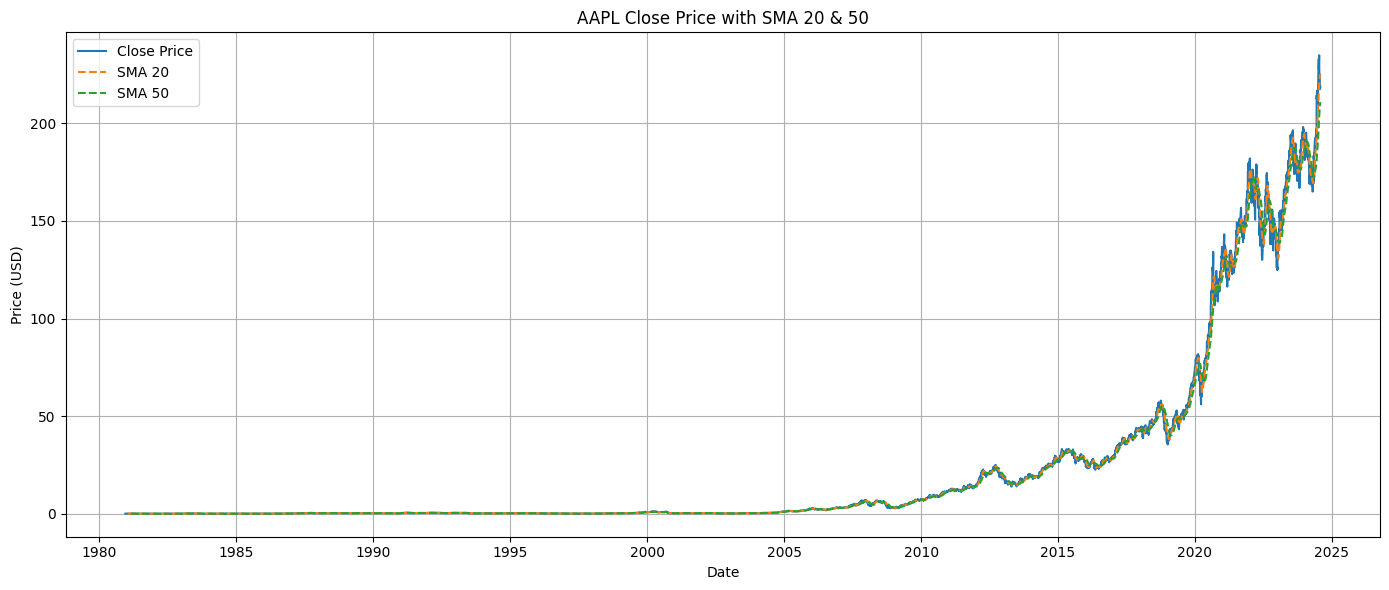

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df_aapl_indicators['Close'], label='Close Price', linewidth=1.5)
plt.plot(df_aapl_indicators['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df_aapl_indicators['SMA_50'], label='SMA 50', linestyle='--')
plt.title("AAPL Close Price with SMA 20 & 50")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plot RSI

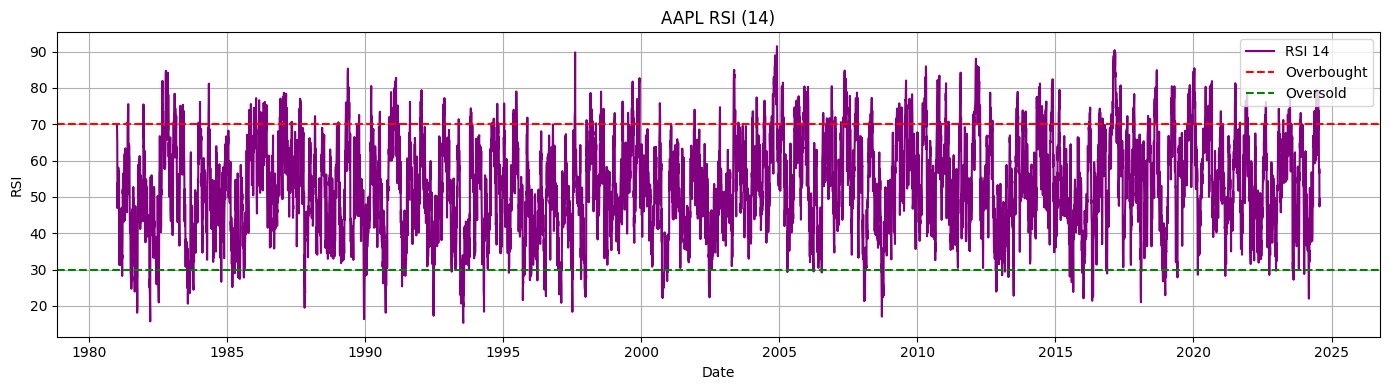

In [5]:
plt.figure(figsize=(14, 4))
plt.plot(df_aapl_indicators['RSI_14'], color='purple', label='RSI 14')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("AAPL RSI (14)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Plot MACD and Signal Line

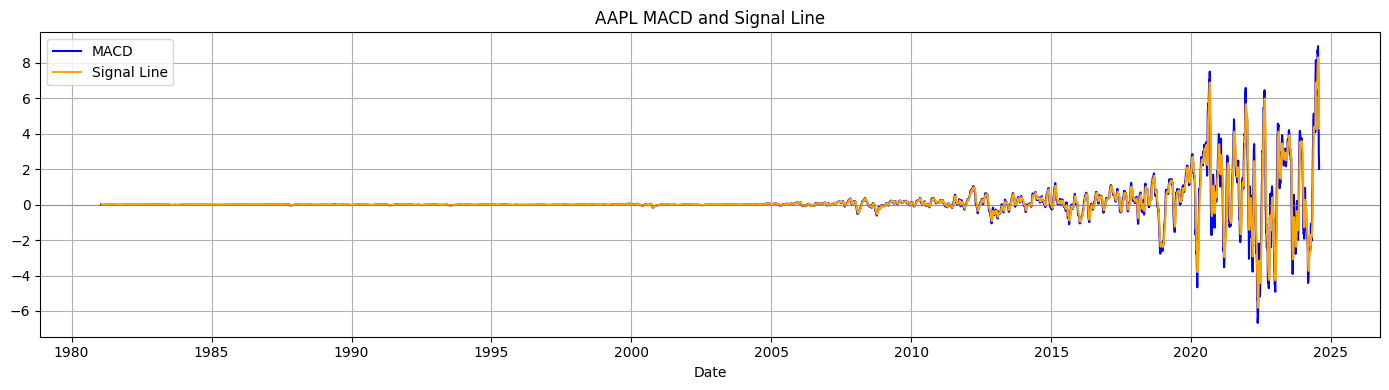

In [6]:
plt.figure(figsize=(14, 4))
plt.plot(df_aapl_indicators['MACD'], label='MACD', color='blue')
plt.plot(df_aapl_indicators['MACD_signal'], label='Signal Line', color='orange')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("AAPL MACD and Signal Line")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
